# **Naive Bayes Classification**

In [29]:
# import necessary libraries

import pandas as pd # for dataframe manipulation
import matplotlib.pyplot as plt # for plotting
from sklearn.model_selection import train_test_split # for splitting datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # for displaying the confusion matrix

### Step 1: Reading and analysing the dataset

In [30]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/PS02 M230345CS CHINMAY/Bank_Personal_Loan_Modelling.xlsx", "Data")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [31]:
# Checking columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Checking statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


If we check the minimum value for the "Experience" column, we see that it is -3, which is logically not possible. It is likely an error. We will have to deal with those before moving on to modelling the data. In this case, we choose to remove the rows where experience is negative.

In [34]:
# Checking the negative values
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [35]:
# Checking the number of rows with negative values for experience
df[df['Experience'] < 0]['Experience'].count()

52

In [36]:
# Removing rows with negative experience
df2 = df[df.Experience >= 0]
df2[df2['Experience'] < 0]['Experience'].count()

0

In [38]:
df2.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,4948.0,2501.268795,1443.277676,1.0,1254.75,2497.5,3750.25,5000.0
Age,4948.0,45.557195,11.320735,24.0,36.00,46.0,55.00,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.00,43.0
Income,4948.0,73.814470,46.112596,8.0,39.00,64.0,98.00,224.0
ZIP Code,4948.0,93151.573363,2126.669017,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4948.0,2.391471,1.148444,1.0,1.00,2.0,3.00,4.0
CCAvg,4948.0,1.935900,1.747700,0.0,0.70,1.5,2.60,10.0
Education,4948.0,1.878941,0.839745,1.0,1.00,2.0,3.00,3.0
Mortgage,4948.0,56.634398,101.828885,0.0,0.00,0.0,101.00,635.0
Personal Loan,4948.0,0.097009,0.296000,0.0,0.00,0.0,0.00,1.0


In [39]:
# Checking number of unique values in each column
for column in df.columns:
  print(column,":", len(df[column].unique()))

ID : 5000
Age : 45
Experience : 47
Income : 162
ZIP Code : 467
Family : 4
CCAvg : 108
Education : 3
Mortgage : 347
Personal Loan : 2
Securities Account : 2
CD Account : 2
Online : 2
CreditCard : 2


In [40]:
# Removing the uninteresting ID, ZIP Code columns
data = df2.drop(["ID", "ZIP Code"], axis=1)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [41]:
# Checking the number of samples in each class
n_0 = len(data[data["Personal Loan"] == 0])
n_1 = len(data[data["Personal Loan"] == 1])
print("# samples with class 0:", n_0)
print("# samples with class 1:", n_1)

# samples with class 0: 4468
# samples with class 1: 480


### Step 2: Modelling using Naive Bayes

#### 2.1 Splitting into training and testing sets

In [42]:
X = data.drop(["Personal Loan"], axis=1)
y = data["Personal Loan"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3994,42,18,88,4,0.8,1,0,0,0,1,1
1893,49,24,13,1,0.4,3,101,1,0,0,0
1391,44,18,84,3,1.1,1,0,0,0,0,0
3671,50,25,18,1,0.4,3,0,0,0,1,0
923,55,30,28,1,1.5,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4474,66,41,73,3,2.4,1,0,0,0,0,0
470,32,6,84,4,1.8,2,0,0,0,0,0
3123,44,17,22,3,1.0,2,126,0,0,1,1
3812,39,13,52,1,2.0,1,0,0,0,0,1


In [45]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize and train the Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

"""
# Function to predict loan given Age, Income, and Education
def predict_loan(age, income, education):
    input_data = pd.DataFrame({'Age': [age], 'Income': [income], 'Education': [education]})
    prediction = classifier.predict(input_data)
    return prediction[0]

# Predict loan for sample data
sample_age = 35
sample_income = 50000
sample_education = 3
loan_prediction = predict_loan(sample_age, sample_income, sample_education)
print("Loan Prediction:", loan_prediction)
"""
# Evaluate model performance
y_pred = classifier.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.4411764705882353
Recall: 0.6122448979591837
F1 Score: 0.5128205128205129


#### 2.2 Calculating conditional probabilities for each feature (likelihoods)

In [17]:
# We store the likelihoods/conditionals for each feature in a dictionary
def calc_likelihoods(data):
    likelihoods = {} #  dictionary to store likelihoods for each feature

    # outer loop iterates through all features
    for column in data.columns:
        likelihoods[column] = {} # dictionary to store likelihoods for each unique value of the feature under consideration
        sum_0 = 0
        sum_1 = 0

        # Inner loop iterates over all unique values of the feature under examination
        for feature in data[column].unique():
            key = str(feature) # key to be used to index our dictionary
            d_0 = data.loc[(data[column] == feature) & (data["Personal Loan"] == 0)] # class 0
            d_1 = data.loc[(data[column] == feature) & (data["Personal Loan"] == 1)] # class 1

            # Calculating conditionals
            p_0 = len(d_0) / n_0
            p_1 = len(d_1) / n_1

            # Storing the calculated likelihoods
            likelihoods[column][key] = {"0": p_0, "1": p_1}
    return likelihoods

#### 2.3 Calculating posterior probability

In [18]:
def calc_posterior(priors, likelihoods, age, income, education):
    # Getting the prior probabilities
    prior0 = priors["0"]
    prior1 = priors["1"]

    # Exit if invalid data is encountered
    if(age < 0 or income < 0 or education < 0):
        print("Error: Age, income and education cannot be zero")
        return -1

    # Calculate posterior probabilities
    else:
        # P(0 | age, income, education)
        p_age_0 = likelihoods["Age"][str(age)]["0"]
        p_inc_0 = likelihoods["Income"][str(income)]["0"]
        p_exp_0 = likelihoods["Education"][str(education)]["0"]
        p0 = p_age_0 * p_inc_0 * p_exp_0 * prior0

        # P(1 | age, income, education)
        p_age_1 = likelihoods["Age"][str(age)]["1"]
        p_inc_1 = likelihoods["Income"][str(income)]["1"]
        p_exp_1 = likelihoods["Education"][str(education)]["1"]
        p1 = p_age_1 * p_inc_1 * p_exp_1 * prior1

        # Since p0 + p1 should be 1, we normalize to get the class probabilities
        class_0 = p0 / (p0 + p1)
        class_1 = p1 / (p0 + p1)

    result = 0 if class_0 > class_1 else 1
    return result

#### 2.4 Building the model

##### 2.4.1: Separating by class to calculate prior probabilities

In [19]:
# Creating a dataset with just the training data - features + target
data = X_train
data["Personal Loan"] = y_train

In [20]:
priors = {} # variable to store prior probabilities of the two target classes
n = len(data) # total number of samples in the dataset
priors["0"] = len(data[data["Personal Loan"] == 0]) / n
priors["1"] = len(data[data["Personal Loan"] == 1]) / n
priors

{'0': 0.903211318212441, '1': 0.09678868178755895}

##### 2.4.2 Calculating likelihoods on the train set

In [21]:
likelihoods = calc_likelihoods(data)

In [ ]:
# # Scratchpad
# print(likelihoods["Education"]["1"])
# print(len(likelihoods["Income"].keys()))
# # for i in conditionals["Income"].keys():
# #   print(type(i), i)
# print(len(likelihoods["Age"].keys()))
# print(likelihoods["Age"].keys())

### Step 3: Prediction on the test set

We use the *X_test* generated in the dataset split and consider the features Age, Experience, Income to calculate the posterior probabilities using our Naive Bayes classifier trained on *X_train*. We will check against the true labels of the test set, given in the *y_test* dataframe.

In [22]:
predictions = [] # to store predictions

for index, row in X_test.iterrows():
    age = int(row["Age"])
    income = int(row["Income"])
    education = int(row["Education"])
    y_pred = calc_posterior(priors, likelihoods, age, income, education)
    predictions.append(y_pred)

In [23]:
y_test = list(y_test)

In [ ]:
# for i in range(len(predictions)):
#     print("Predicted:", predictions[i], "True:", y_test[i])

### Step 4: Performance evaluation

We shall evaluate the performance of our classifier using precision, recall and F1-score. To calculate these metrics, we shall create a confusion matrix which will show the number of true positives, true negatives, false positives and false negatives.

#### 4.1 Calculate TP, TN, FP, FN

In [24]:
TP = 0 # true positives i.e., predicted class 0, ground truth is also class 0
TN = 0 # true negatives i.e., predicted class 1, ground truth is also class 1
FP = 0 # false positives i.e., predicted class 0, ground truth is 1
FN = 0 # false negatives i.e., predicted class 1, ground truth is 0

for i in range(len(y_test)):
    if y_test[i] == 0 and y_test[i] == predictions[i]:
        TP += 1
    elif y_test[i] == 1 and y_test[i] == predictions[i]:
        TN += 1
    elif y_test[i] == 1 and predictions[i] == 0:
        FP += 1
    else:
        FN += 1

In [25]:
print("TP, TN, FP, FN =", TP, TN, FP, FN)

TP, TN, FP, FN = 444 18 31 2


#### 4.2 Display the confusion matrix

In [26]:
conf_mat = confusion_matrix(y_test, predictions)
conf_mat

array([[444,   2],
       [ 31,  18]])

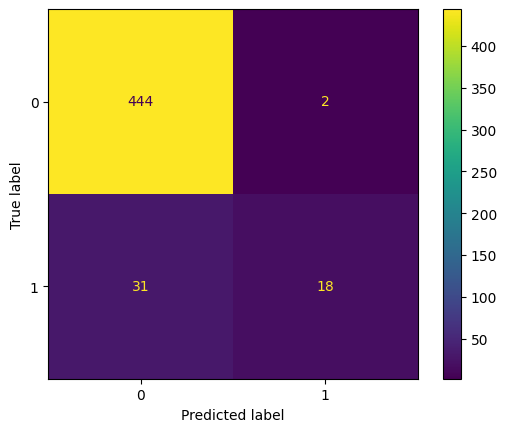

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

#### 4.3 Calculate metrics - accuracy, precision, recall, F1-score

The formula for these metrics are given by:
$Accuracy$ = $\frac{TP+TN}{TP + TN + FP + FN}$,

$Precision$ = $\frac{TP}{TP + FP}$,

$Recall$ = $\frac{TP}{TP + FN}$,

$F_{1}$ = $2 \times \frac{Precision  \cdot  {Recall}}{Precision + Recall}$

$TP$ = True Positives, $TN$ = True Negatives, $FP$ = False Positives, $FN$ = False Negatives

In [28]:
acc = round(((TP + TN) / (TP + TN + FP + FN)), 2)
precision = round((TP / (TP + FP)), 2)
recall = round((TP / (TP + FN)), 2)
f1 = round((2 * ((precision * recall)/(precision + recall))), 2)

print("Accuracy: {}, \nPrecision: {} \nRecall: {} \nF1-score: {}".format(acc, precision, recall, f1))

Accuracy: 0.93, 
Precision: 0.93 
Recall: 1.0 
F1-score: 0.96
